In [1174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.dummy import DummyRegressor

In [1175]:
def categorie_bmi(bmi):
    if bmi < 18.5:
        return 'faible'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'surpoids'
    else:
        return 'obesité'

In [1176]:
def categorie_obesite_fumeur(categorie_bmi,smoker):
    if categorie_bmi == 'obesité' and smoker =='yes':
        return 'yes'
    else:
        return 'no'

In [1177]:
df= pd.read_csv('brief_assurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1178]:
df['categorie_bmi'] = df['bmi'].apply(categorie_bmi)

In [1179]:
df['fumeur et obesité'] = df.apply(lambda x: categorie_obesite_fumeur(x["categorie_bmi"], x["smoker"]), axis=1)
df['fumeur et obesité'].value_counts()

no     1193
yes     145
Name: fumeur et obesité, dtype: int64

In [1180]:
df = df.drop(['bmi'],axis=1)

In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   object 
 2   children           1338 non-null   int64  
 3   smoker             1338 non-null   object 
 4   region             1338 non-null   object 
 5   charges            1338 non-null   float64
 6   categorie_bmi      1338 non-null   object 
 7   fumeur et obesité  1338 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 83.8+ KB


In [1182]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.15,random_state=42, stratify=X[['smoker','region','sex']])

In [1183]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train,shuffle=True, test_size=0.2,random_state=42, stratify=None)

In [1184]:
dummy_regr = DummyRegressor(strategy="mean")
X_train.head()
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-0.013743454770904995

In [1185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   object 
 2   children           1338 non-null   int64  
 3   smoker             1338 non-null   object 
 4   region             1338 non-null   object 
 5   charges            1338 non-null   float64
 6   categorie_bmi      1338 non-null   object 
 7   fumeur et obesité  1338 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 83.8+ KB


In [1186]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.2,random_state=42, stratify=X[['smoker','region','sex']])

In [1187]:
df

,age,sex,children,smoker,region,charges,categorie_bmi,fumeur et obesité
0,19,female,0,yes,southwest,16884.92400,surpoids,no
1,18,male,1,no,southeast,1725.55230,obesité,no
2,28,male,3,no,southeast,4449.46200,obesité,no
3,33,male,0,no,northwest,21984.47061,normal,no
4,32,male,0,no,northwest,3866.85520,surpoids,no
...,...,...,...,...,...,...,...,...
1333,50,male,3,no,northwest,10600.54830,obesité,no
1334,18,female,0,no,northeast,2205.98080,obesité,no
1335,18,female,0,no,southeast,1629.83350,obesité,no
1336,21,female,0,no,southwest,2007.94500,surpoids,no


In [1188]:
quantitative_col = list(X.select_dtypes(include=[float,int]).columns)
categoriel_col = list(X.select_dtypes(include=[object]).columns)

quantitative_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures())
categoriel_pipeline = make_pipeline(OneHotEncoder(drop='if_binary'),PolynomialFeatures())


preprocessing=ColumnTransformer([("one_hot",categoriel_pipeline,categoriel_col),("scaling",quantitative_pipeline,quantitative_col)])

In [1189]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge())

my_pipe_lasso = make_pipeline(preprocessing, Lasso())

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet())

In [1190]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())

0.849934106034166


In [1191]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.849934106034166
0.8512505526044885


/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127523190.1352272, tolerance: 12538019.60947149
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126474053.27505302, tolerance: 12953918.591874473
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104764617.89445114, tolerance: 12765047.51531609
  model = cd_fast.sparse_enet_

0.8507567690117128
0.7328817283783915


/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64815064.87200546, tolerance: 12952071.965206385
  model = cd_fast.sparse_enet_coordinate_descent(


In [1192]:
param_grid={'ridge__alpha':np.arange(1,50)/10
            }
search_ridge = GridSearchCV(my_pipe_ridge, param_grid,cv=5)

In [1193]:
my_pipe_ridge.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(drop='if_binary')),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['sex', 'smoker', 'region', 'categorie_bmi',
                                     'fumeur et obesité']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('ridge', Ridge())],
 'verbose': False,
 'colu

In [1194]:
search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary')),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi',
                                                                          'fumeur '
                                                                          'et '
                                                                          'obesité']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [1195]:
search_ridge.best_score_

0.8523248046009495

In [1196]:
search_ridge.best_params_

{'ridge__alpha': 4.9}

In [1197]:
param_grid={'lasso__alpha':np.arange(1,50)/10
            }
search_lasso = GridSearchCV(my_pipe_lasso, param_grid,cv=5)
search_lasso.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1562991746.850256, tolerance: 12538019.60947149
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072409681.1657133, tolerance: 12953918.591874473
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2369197878.2216873, tolerance: 12765047.51531609
  model = cd_fast.sparse_enet_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary')),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi',
                                                                          'fumeur '
                                                                          'et '
                                                                          'obesité']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [1198]:
search_lasso.best_score_

0.8523075291064897

In [1199]:
search_lasso.best_params_

{'lasso__alpha': 4.9}

In [1200]:
search_elasticnet=GridSearchCV(my_pipe_elasticnet,param_grid,cv=5)

In [1201]:
my_pipe_elasticnet.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(drop='if_binary')),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['sex', 'smoker', 'region', 'categorie_bmi',
                                     'fumeur et obesité']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('elasticnet', ElasticNet())],
 'verbose': Fal

In [1202]:
param={'elasticnet__alpha':np.arange(1,50)/10,
'elasticnet__l1_ratio':np.arange(1,50)/10
            }

search_elasticnet = GridSearchCV(my_pipe_elasticnet,param,cv=5)
search_elasticnet.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1562991746.850256, tolerance: 12538019.60947149
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072409681.1657133, tolerance: 12953918.591874473
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2369197878.2216873, tolerance: 12765047.51531609
  model = cd_fast.sparse_enet_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary')),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi',
                                                                          'fumeur '
                                                                          'et '
                                                                          'obesité']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('...
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'elasticnet__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [1203]:
search_lasso.best_score_

0.8523075291064897

In [1204]:
search_elasticnet.best_params_

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}

In [1205]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge(alpha=0.2))

my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=3.7))

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet(alpha=3.7 ,l1_ratio = 1.0))

In [1206]:
for x in my_pipe_lasso:
    print(x)
    print('---')


ColumnTransformer(transformers=[('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary')),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures())]),
                                 ['sex', 'smoker', 'region', 'categorie_bmi',
                                  'fumeur et obesité']),
                                ('scaling',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures())]),
                                 ['age', 'children'])])
---
Lasso(alpha=3.7)
---


In [1207]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.849934106034166
0.8503646003175737
0.8520180491314859
0.8520180491314859


In [1208]:
my_pipe_lr.fit(X_train, y_train)
print(my_pipe_lr.score(X_test, y_test))

my_pipe_ridge.fit(X_train, y_train)
print(my_pipe_ridge.score(X_test, y_test))

my_pipe_lasso.fit(X_train, y_train)
print(my_pipe_lasso.score(X_test, y_test))

my_pipe_elasticnet.fit(X_train, y_train)
print(my_pipe_elasticnet.score(X_test, y_test))

0.8830295133146213
0.8832778875596166
0.8847492979753849
0.8847492979753849


In [1209]:

my_pipe_lr.fit(X_train,y_train)
my_pipe_lr.score(X_test,y_test)


0.8830295133146213

In [1210]:
my_pipe_ridge.fit(X_train,y_train)
my_pipe_ridge.score(X_test,y_test)

0.8832778875596166

In [1211]:
my_pipe_lasso.fit(X_train,y_train)
my_pipe_lasso.score(X_test,y_test)

0.8847492979753849

In [1212]:
my_pipe_elasticnet.fit(X_train,y_train)
my_pipe_elasticnet.score(X_test,y_test)

0.8847492979753849

In [1213]:
y_pred = my_pipe_ridge.predict(X_train)
residual =(y_pred-y_train).abs().sort_values(ascending=False)
residual

516     24016.257239
242     22010.442074
936     21622.108571
430     21350.361144
1300    20910.068231
            ...     
224        45.734715
1030       43.266573
795        15.915949
417         7.306699
280         4.862522
Name: charges, Length: 1070, dtype: float64

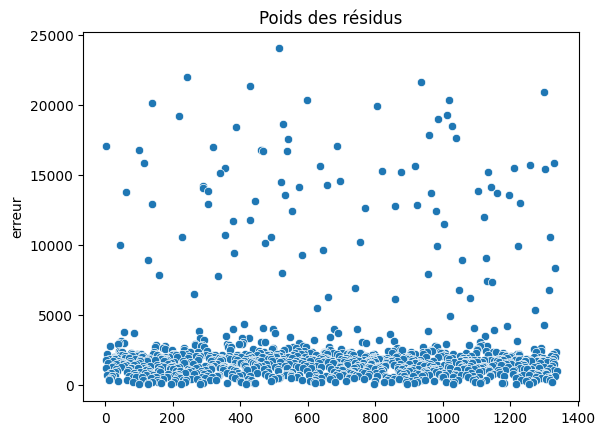

In [1214]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [1215]:
residual.info()

<class 'pandas.core.series.Series'>
Int64Index: 1070 entries, 516 to 280
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [1216]:
to_drop=residual[residual>17000].index

In [1217]:
to_drop


Int64Index([ 516,  242,  936,  430, 1300,  599, 1019,  140,  806, 1012,  219,
             987,  526, 1027,  387,  959, 1039,  543,    3,  688],
           dtype='int64')

In [1218]:
to_drop.size

20

In [1219]:
X_train_drop_residu = X_train.drop(to_drop)
y_train_drop_residu = y_train.drop(to_drop)


In [1220]:
print(cross_val_score(my_pipe_lr,X_train_drop_residu,y_train_drop_residu,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train_drop_residu,y_train_drop_residu,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train_drop_residu,y_train_drop_residu,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train_drop_residu,y_train_drop_residu,cv=5).mean())

0.8995965752098293
0.9000578974097962
0.9015649489325313
0.9015649489325313


In [1221]:
my_pipe_lr.fit(X_train_drop_residu, y_train_drop_residu)
print(my_pipe_lr.score(X_test, y_test))

my_pipe_ridge.fit(X_train_drop_residu, y_train_drop_residu)
print(my_pipe_ridge.score(X_test, y_test))

my_pipe_lasso.fit(X_train_drop_residu, y_train_drop_residu)
print(my_pipe_lasso.score(X_test, y_test))

my_pipe_elasticnet.fit(X_train_drop_residu, y_train_drop_residu)
print(my_pipe_elasticnet.score(X_test, y_test))

0.8845926464063483
0.8848586166417536
0.8864023866072797
0.8864023866072797


In [1222]:
import pickle 
pickle_out = open("my_pipe_lasso.pkl", "wb") 
pickle.dump(my_pipe_lasso, pickle_out) 
pickle_out.close()

In [1223]:
X_train_drop_residu

,age,sex,children,smoker,region,categorie_bmi,fumeur et obesité
717,60,male,1,no,northwest,normal,no
787,21,male,0,no,northwest,obesité,no
323,57,male,0,no,northeast,obesité,no
393,49,male,1,no,northeast,obesité,no
1102,29,male,1,no,southeast,obesité,no
...,...,...,...,...,...,...,...
1079,63,male,3,no,southeast,obesité,no
438,52,female,5,no,southeast,obesité,no
823,44,female,2,no,southeast,surpoids,no
1302,25,female,1,no,southwest,normal,no


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:42:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

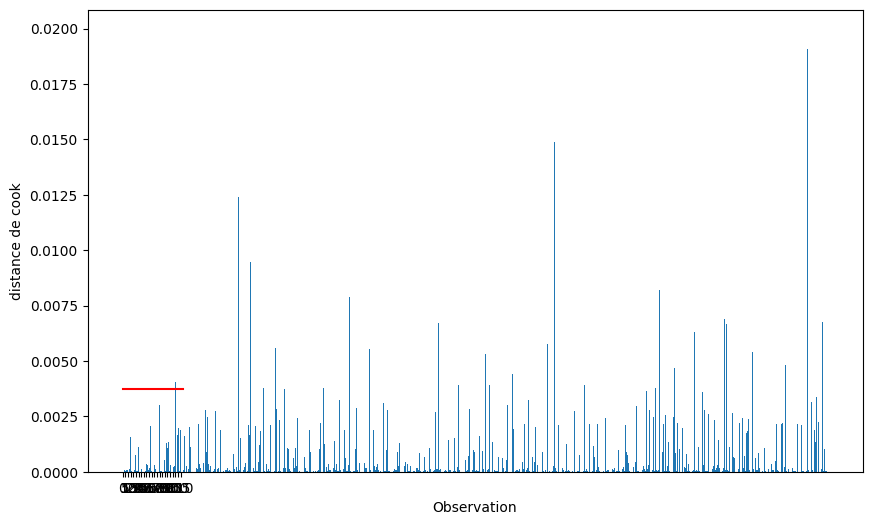

In [1224]:
%run modelisation_model_perfomantes.ipynb

In [1225]:
cook_residual_index

Int64Index([   3,    9,   34,   62,   99,  102,  115,  138,  140,  219,  242,
             250,  266,  289,  321,  340,  355,  380,  387,  412,  430,  468,
             488,  491,  516,  526,  539,  543,  573,  577,  587,  599,  637,
             688,  696,  739,  806,  819,  876,  936,  959,  987, 1008, 1011,
            1012, 1019, 1027, 1039, 1047, 1080, 1085, 1142, 1146, 1195, 1206,
            1230, 1258, 1300, 1328],
           dtype='int64')

In [1226]:
X_train_drop_residu.index

Int64Index([ 717,  787,  323,  393, 1102, 1131, 1320,  817,  312,  346,
            ...
              25,  111,  462,  589, 1181, 1079,  438,  823, 1302, 1287],
           dtype='int64', length=1050)

In [1227]:
y_train_drop_residu.index

Int64Index([ 717,  787,  323,  393, 1102, 1131, 1320,  817,  312,  346,
            ...
              25,  111,  462,  589, 1181, 1079,  438,  823, 1302, 1287],
           dtype='int64', length=1050)

In [1228]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 717 to 1287
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                1070 non-null   int64 
 1   sex                1070 non-null   object
 2   children           1070 non-null   int64 
 3   smoker             1070 non-null   object
 4   region             1070 non-null   object
 5   categorie_bmi      1070 non-null   object
 6   fumeur et obesité  1070 non-null   object
dtypes: int64(2), object(5)
memory usage: 99.2+ KB


In [1229]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1070 entries, 717 to 1287
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 49.0 KB


In [1230]:
residual_index

Int64Index([   3,    9,   34,   62,   99,  102,  115,  138,  140,  219,  242,
             250,  266,  289,  321,  340,  355,  380,  387,  412,  430,  468,
             488,  491,  516,  526,  539,  543,  573,  577,  587,  599,  637,
             688,  696,  739,  806,  819,  876,  936,  959,  987, 1008, 1011,
            1012, 1019, 1027, 1039, 1047, 1080, 1085, 1142, 1146, 1195, 1206,
            1230, 1258, 1300, 1328],
           dtype='int64')

In [1231]:
liste_to_drop_x =[]
liste_to_drop_y =[]
X_train_drop_cook = X_train.copy()
y_train_drop_cook = y_train.copy()

for index in residual_index:
    if index in X_train_drop_cook.index:
        X_train_drop_cook.drop(index,inplace=True,axis=0)
        liste_to_drop.append(index)

for index in residual_index:
    if index in y_train_drop_cook.index:
        y_train_drop_cook.drop(index,inplace=True,axis=0)

print(len(liste_to_drop_x))
print(len(liste_to_drop_y))



0
0


In [1232]:
X_train_drop_cook.index

Int64Index([ 717,  787,  323,  393, 1102, 1131, 1320,  817,  312,  346,
            ...
              25,  111,  462,  589, 1181, 1079,  438,  823, 1302, 1287],
           dtype='int64', length=1019)

In [1233]:
y_train_drop_cook.index

Int64Index([ 717,  787,  323,  393, 1102, 1131, 1320,  817,  312,  346,
            ...
              25,  111,  462,  589, 1181, 1079,  438,  823, 1302, 1287],
           dtype='int64', length=1019)

In [1234]:
my_pipe_lr.fit(X_train_drop_cook, y_train_drop_cook)
print(my_pipe_lr.score(X_test, y_test))

my_pipe_ridge.fit(X_train_drop_cook, y_train_drop_cook)
print(my_pipe_ridge.score(X_test, y_test))

my_pipe_lasso.fit(X_train_drop_cook, y_train_drop_cook)
print(my_pipe_lasso.score(X_test, y_test))

my_pipe_elasticnet.fit(X_train_drop_cook, y_train_drop_cook)
print(my_pipe_elasticnet.score(X_test, y_test))

0.8751207835352871
0.8794307940079953
0.8822684281472174
0.8822684281472174


In [1235]:
for etape in my_pipe_lasso:
    print(dir(etape))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_prefix_for_feature_names_out', '_check_feature_names', '_check_n_features', '_columns', '_fit_transform', '_get_feature_name_out_for_transformer', '_get_param_names', '_get_params', '_get_tags', '_hstack', '_iter', '_log_message', '_more_tags', '_n_features', '_name_to_fitted_passthrough', '_record_output_indices', '_remainder', '_replace_estimator', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_params', '_sk_visual_block_', '_sklearn_auto_wrap_output_keys', '_transformer_to_input_indices', '_transformers', '_update_

In [1236]:
pd.set_option('display.max_rows',90)

col_name = preprocessing.get_feature_names_out()

pd.DataFrame(data=my_pipe_lasso[-1].coef_, columns=['coefs'], index=col_name).sort_values(by ='coefs',ascending=False)

,coefs
one_hot__fumeur et obesité_yes,1.713887e+04
one_hot__smoker_yes,1.468680e+04
one_hot__smoker_yes categorie_bmi_faible,8.316356e+03
scaling__age,3.697537e+03
one_hot__region_southeast fumeur et obesité_yes,9.966674e+02
scaling__children,7.871725e+02
one_hot__region_northeast categorie_bmi_obesité,6.661256e+02
one_hot__region_southeast categorie_bmi_normal,5.851749e+02
scaling__age^2,5.253229e+02
one_hot__region_northeast,4.854751e+02


meilleur score sans determine parametre alpha 0.765063644178095

In [1237]:
a

NameError: name 'a' is not defined

In [ ]:
# import pickle 
# pickle_out = open("my_pipe_lasso.pkl", "wb") 
# pickle.dump(my_pipe_lasso, pickle_out) 
# pickle_out.close()